## Project Brief: Analysis of Community Discharge Portal Impact on Length of Stay


### Problem Statement
Manchester General Ward (MGW) implemented a new community discharge portal on January 1, 2025, aimed at speeding up patient discharges, particularly for older patients who require community care post-hospitalization. The Head of Performance suspects a 20% reduction in the average length of stay (LoS) since implementation and has provided six months of admission data for verification. 

### Assumptions

- The data provided is complete and accurate for the past six months.
- The discharge portal is effective for patients over 70 who require community support.
- Generally older patients - especially those over 70 - are much more likely to require community support upon discharge so should be the most impacted by the community discharge portal.
- The portal is not effective for patients with Norovirus. Norovirus cases are seasonal and short-term, and are not in scope.
- Norovirus cases are excluded from the Discharge Portal’s impact, but may still influence overall averages.
- The community discharge portal is fully operational since January 1, 2025.
- Length of Stay (LoS) is a key metric, assuming shorter LoS implies faster discharges.

### Analysis Goals
- Verify if there has been a 20% reduction in the average LoS since the implementation of the community discharge portal.
- Investigate if the reduction in LoS is more pronounced for patients over 70.
- Identify any seasonal trends or anomalies in the LoS data.
- Provide recommendations based on the findings.

### Analysis Questions
- Has there been a statistically significant reduction in the average LoS since the implementation of the community discharge portal?
- Is the reduction in LoS more pronounced for patients over 70?
- Are there any seasonal trends or anomalies in the LoS data?
- Are there any specific admission types that benefit more from the community discharge portal?

### Hypothesis
- H₀ (Null Hypothesis): There is no significant reduction in admission length of stay after the portal’s implementation.
- H₁ (Alternative Hypothesis): There is a significant reduction in admission length of stay after the portal’s implementation.

### Key Metrics
- Average Length of Stay (LoS) before and after the implementation of the community discharge portal.
- Average LoS for patients over 70 before and after the implementation.
- LoS trends over the past six months.
- LoS distribution and variability.
- LoS by admission type.

### Analysis Plan
- Calculate the average LoS before and after the implementation of the community discharge portal.
- Compare the average LoS for patients over 70 before and after the implementation.
- Analyze the LoS trends over the past six months to identify any seasonal patterns.
- Segment the analysis by admission type to check if certain groups benefit more from the discharge portal.
- Assess LoS distribution and variability to check for anomalies/outliers or inconsistencies.
- Conduct hypothesis tests to verify the significance of the findings.

### Data
The data provided includes six months of admission data with the following fields: 

- ID: Unique identifier for each patient admission
- IsWeekendAdmission: Binary variable indicating if the admission was on a weekend. Binary flag (1 = Weekend, 0 = Weekday)
- PatientAge: Age of the patient
- AdmissionType: Chronic Conditions, Trauma, Circulation, Norovirus, Other
- ComorbidityScore: A score indicating the Severity of underlying conditions (higher values indicate more severe comorbidities).
- AdmissionDate: Date of hospital admission
- DischargeDate: Date of discharge (some missing values).

The data is stored in an Excel file named `Principal Analyst Test Data.xlsx`.

### Tasks
- Data Cleaning: Check for missing values, duplicates, and inconsistencies. Convert data types if necessary.
- Exploratory Data Analysis: Understand the data distribution, summary statistics, and relationships between variables.
- Analysis: Calculate the average LoS before and after the implementation of the community discharge portal. Compare the LoS for patients over 70.
- Visualization: Create visualizations to present the findings effectively.
- Hypothesis Testing: Conduct statistical tests to verify the significance of the findings.
- Recommendations: Provide actionable insights and recommendations based on the analysis.

### Tools
- Python: Pandas, NumPy, Matplotlib, Seaborn, SciPy
- Jupyter Notebook

### Deliverables
- Jupyter Notebook with the analysis code and comments. Include visualizations and statistical tests.
- Summary of findings and recommendations. Include key insights and actionable recommendations.
- Documentation explaining the analysis plan, assumptions, data cleaning steps, and analysis results.   

## Project Analysis

In [26]:
import os #importing os module
import pandas as pd #importing pandas module
import numpy as np #importing numpy module     
import matplotlib.pyplot as plt #importing matplotlib module
import seaborn as sns #importing seaborn module
import scipy.stats as stats #importing scipy module
from scipy.stats import ttest_ind


In [27]:
# Define the path to the Excel file. Get the current working directory
current_dir = os.getcwd()

# Define the relative path to the data folder
data_folder = os.path.join(current_dir, '..', 'data')

# Define the full path to the Excel file
excel_file_path = os.path.join(data_folder, 'Principal Analyst Test Data.xlsx')

# Load the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

In [28]:
# Overview of the dataset
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54760 entries, 0 to 54759
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  54760 non-null  int64         
 1   IsWeekendAdmission  54760 non-null  int64         
 2   PatientAge          54760 non-null  int64         
 3   AdmissionType       54760 non-null  object        
 4   ComorbidityScore    54760 non-null  int64         
 5   AdmissionDate       54760 non-null  datetime64[ns]
 6   DischargeDate       53894 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 2.9+ MB
None


In [29]:
 # Summary statistics
print(df.describe()) 

                 ID  IsWeekendAdmission    PatientAge  ComorbidityScore  \
count  54760.000000        54760.000000  54760.000000      54760.000000   
mean   27380.500000            0.142257     56.438550         10.984989   
min        1.000000            0.000000      0.000000          0.000000   
25%    13690.750000            0.000000     41.000000          4.000000   
50%    27380.500000            0.000000     57.000000          8.000000   
75%    41070.250000            0.000000     71.000000         14.000000   
max    54760.000000            1.000000    119.000000        265.000000   
std    15807.994707            0.349317     19.873808         12.367860   

                       AdmissionDate                  DischargeDate  
count                          54760                          53894  
mean   2024-01-31 04:45:45.887509504  2024-02-04 12:13:37.604928256  
min              2023-01-01 00:00:00            2023-01-02 00:00:00  
25%              2023-07-17 00:00:00        

In [30]:
# Display the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())
# Display the last few rows of the DataFrame to confirm it's loaded correctly
print(df.tail())

   ID  IsWeekendAdmission  PatientAge AdmissionType  ComorbidityScore  \
0   1                   1          56     Norovirus                 2   
1   2                   1          75     Norovirus                 5   
2   3                   1          80     Norovirus                 0   
3   4                   1          80     Norovirus                 1   
4   5                   1          75     Norovirus                 1   

  AdmissionDate DischargeDate  
0    2023-01-28    2023-01-30  
1    2023-01-29    2023-01-31  
2    2023-01-29    2023-01-29  
3    2023-01-29    2023-01-31  
4    2023-01-29    2023-01-30  
          ID  IsWeekendAdmission  PatientAge AdmissionType  ComorbidityScore  \
54755  54756                   0          69         Other                15   
54756  54757                   0          44         Other                 2   
54757  54758                   0          68         Other                11   
54758  54759                   0          28     

In [31]:
# Check for missing values
print(df.isnull().sum())

ID                      0
IsWeekendAdmission      0
PatientAge              0
AdmissionType           0
ComorbidityScore        0
AdmissionDate           0
DischargeDate         866
dtype: int64


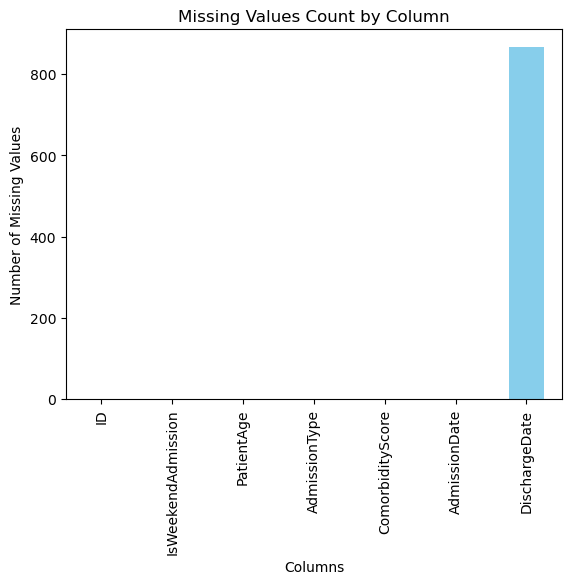

In [32]:
# Count missing values for each column
missing_values = df.isnull().sum()

# Plot the missing values as a bar plot
missing_values.plot(kind='bar', color='skyblue')
plt.title("Missing Values Count by Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

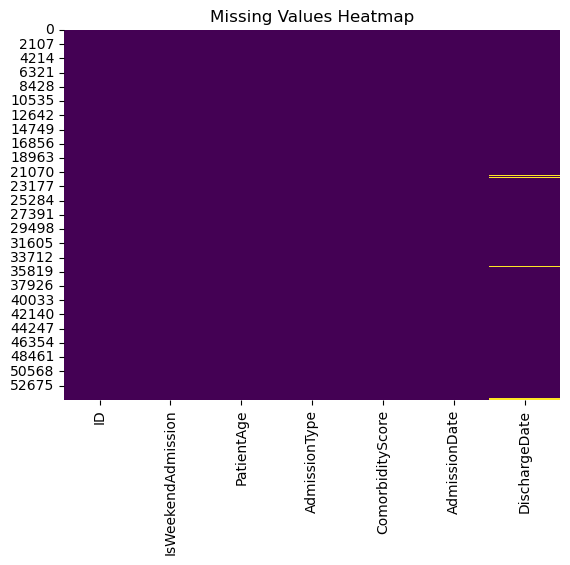

In [33]:
# Visualizing missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

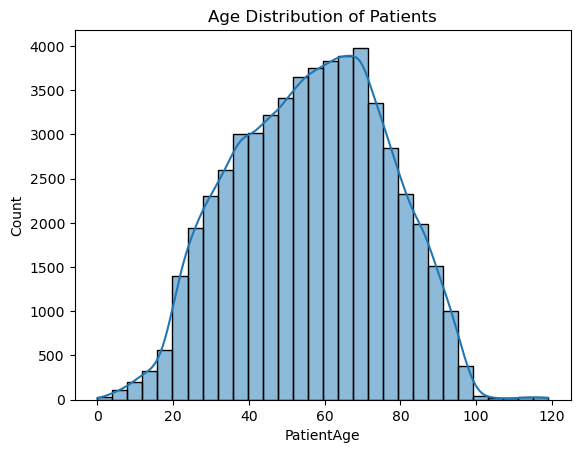

In [34]:
# The histogram shows the distribution of patient ages in the dataset
# The histogram helps visualize the age distribution of patients and identify the most common age groups in the dataset

sns.histplot(data=df, x='PatientAge', bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.show()

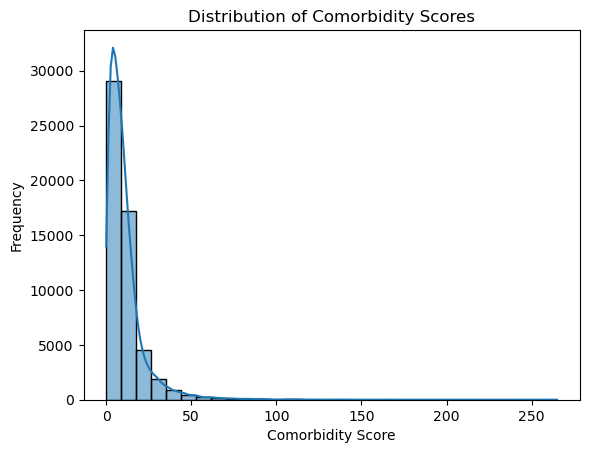

In [35]:
# Distribution of ComorbidityScore
sns.histplot(data=df, x='ComorbidityScore', bins=30, kde=True)
plt.title("Distribution of Comorbidity Scores")
plt.xlabel("Comorbidity Score")
plt.ylabel("Frequency")
plt.show()

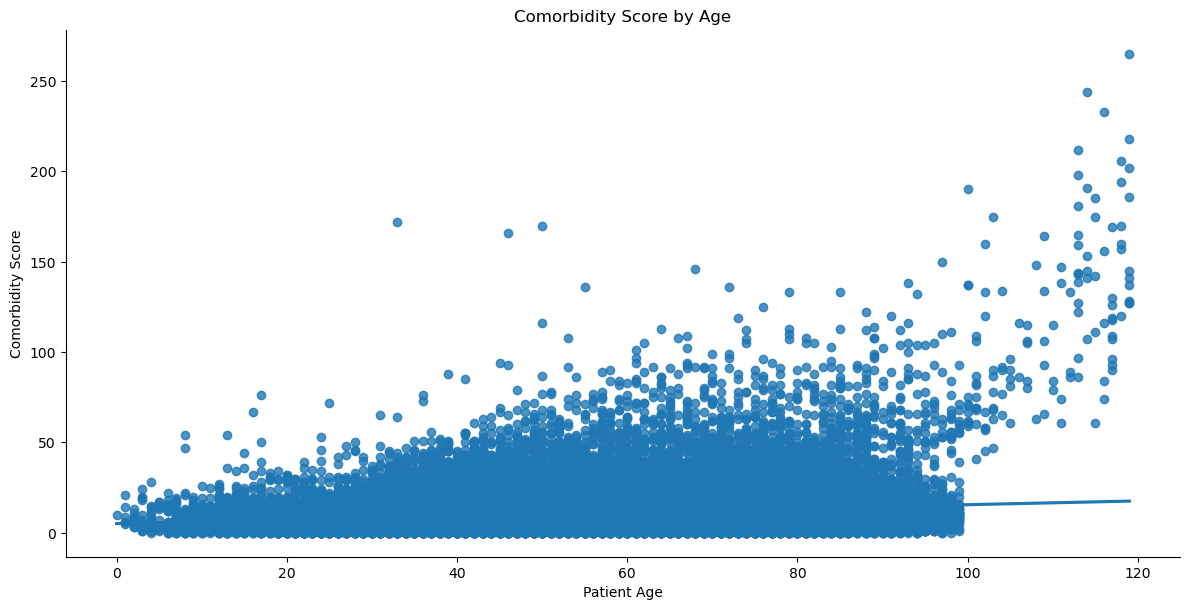

In [36]:
# The scatter plot shows the relationship between patient age and comorbidity score
# The scatter plot helps visualize the distribution of comorbidity scores across different age groups 
# The scatter plot can identify any patterns or correlations between patient age and comorbidity score

sns.lmplot(data=df, x='PatientAge', y='ComorbidityScore', aspect=2, height=6)
plt.title("Comorbidity Score by Age")
plt.xlabel("Patient Age")
plt.ylabel("Comorbidity Score")
plt.show()

In [37]:
# Convert dates to datetime format and calculate Length of Stay (LoS) in days
# Convert the "AdmissionDate" and "DischargeDate" columns to datetime format 
df["AdmissionDate"] = pd.to_datetime(df["AdmissionDate"], format="%d/%m/%Y", errors="coerce")
df["DischargeDate"] = pd.to_datetime(df["DischargeDate"], format="%d/%m/%Y", errors="coerce")

# Calculate Length of Stay (LoS) in days and add it as a new column to the DataFrame
df["LengthOfStay"] = (df["DischargeDate"] - df["AdmissionDate"]).dt.days
df["LengthOfStay"]

0        2.0
1        2.0
2        0.0
3        2.0
4        1.0
        ... 
54755    NaN
54756    NaN
54757    NaN
54758    NaN
54759    NaN
Name: LengthOfStay, Length: 54760, dtype: float64

In [39]:
# Remove rows where LengthOfStay is negative or missing
df = df[df["LengthOfStay"].notna() & (df["LengthOfStay"] >= 0)]

In [40]:
# Define the date when the discharge portal was implemented
implementation_date = pd.to_datetime("2025-01-01")

# Create pre- and post-implementation groups
df["Period"] = df["AdmissionDate"].apply(lambda x: "Pre-Implementation" if x < implementation_date else "Post-Implementation")

# Display summary statistics for LoS before and after implementation
los_summary = df.groupby("Period")["LengthOfStay"].describe()

# Display the summary statistics for Length of Stay
print(los_summary)

                       count       mean        std  min  25%  50%   75%    max
Period                                                                        
Post-Implementation   3899.0   7.237497   6.744591  0.0  2.0  5.0  10.0   50.0
Pre-Implementation   49995.0  10.698110  11.754034  0.0  4.0  8.0  13.0  267.0


In [41]:
# Separate LoS values for statistical testing
los_pre = df[df["Period"] == "Pre-Implementation"]["LengthOfStay"]
los_post = df[df["Period"] == "Post-Implementation"]["LengthOfStay"]

In [42]:
# Perform independent t-test to determine whether the reduction in Length of Stay (LoS) is statistically significant. # Set equal_var=False for Welch's t-test
# Welch's t-test is used when the two samples have unequal variances
# The null hypothesis is that there is no difference in LoS between the pre- and post-implementation periods
# The alternative hypothesis is that there is a difference in LoS between the pre- and post-implementation periods
# A p-value less than 0.05 indicates statistical significance (reject the null hypothesis)
# A positive t-statistic indicates that LoS is higher in the post-implementation period compared to the pre-implementation period
# A negative t-statistic indicates that LoS is lower in the post-implementation period compared to the pre-implementation period 
# The degrees of freedom are adjusted based on the sample variances
# The t-statistic and p-value are calculated using the ttest_ind function from the scipy.stats module 

t_stat, p_value = ttest_ind(los_pre, los_post, equal_var=False)

In [43]:
# Create a DataFrame to display the results
t_test_results = pd.DataFrame({
    "Metric": ["Mean LoS (Pre)", "Mean LoS (Post)", "t-statistic", "p-value"],
    "Value": [los_pre.mean(), los_post.mean(), t_stat, p_value]
}) 

print(t_test_results) # Display the results of the t-test

            Metric          Value
0   Mean LoS (Pre)   1.069811e+01
1  Mean LoS (Post)   7.237497e+00
2      t-statistic   2.880806e+01
3          p-value  6.177074e-171


<Figure size 800x600 with 0 Axes>

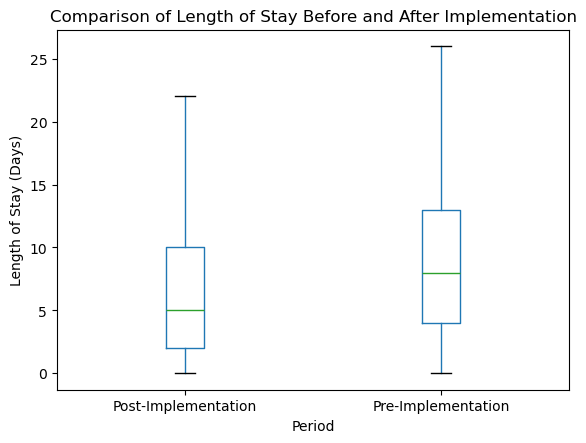

In [44]:
# Create boxplots for Length of Stay before and after implementation to visualize the distribution of LoS values in each period 
# boxplot visually illustrates the reduction in LoS after January 1, 2025
# The boxplot shows the median, quartiles, and outliers for each period
# The outliers are not shown in the boxplot to focus on the main distribution of LoS values 

plt.figure(figsize=(8, 6))
df.boxplot(column="LengthOfStay", by="Period", grid=False, showfliers=False)
plt.title("Comparison of Length of Stay Before and After Implementation")
plt.suptitle("")
plt.xlabel("Period")
plt.ylabel("Length of Stay (Days)")
plt.xticks(rotation=0)
plt.show()

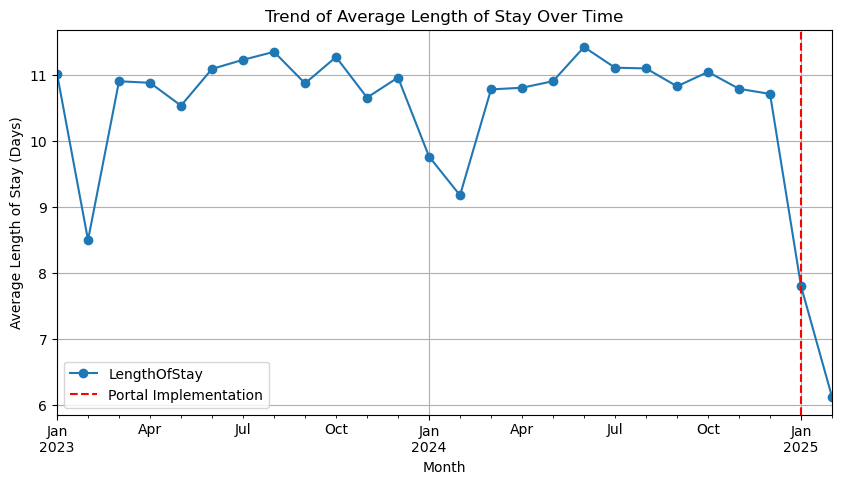

In [45]:
# Group by month and calculate the mean Length of Stay
df["Month"] = df["AdmissionDate"].dt.to_period("M")
los_trend = df.groupby("Month")["LengthOfStay"].mean()

# Plot trend of mean Length of Stay over time - The trend shows the average LoS over time, with a notable decrease after January 2025
# The red dashed line indicates the implementation date of the discharge portal
plt.figure(figsize=(10, 5))
los_trend.plot(marker='o', linestyle='-')
plt.axvline(x=pd.Period("2025-01"), color='red', linestyle="--", label="Portal Implementation")
plt.title("Trend of Average Length of Stay Over Time")
plt.xlabel("Month")
plt.ylabel("Average Length of Stay (Days)")
plt.legend()
plt.grid(True)
plt.show()

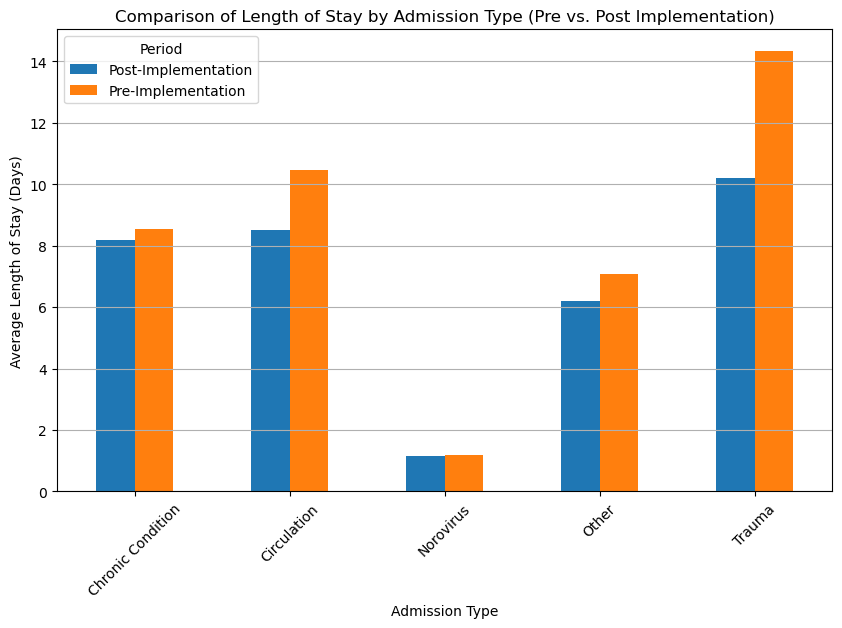

In [46]:
# Group by Admission Type and Period to calculate mean Length of Stay
los_by_admission = df.groupby(["AdmissionType", "Period"])["LengthOfStay"].mean().unstack()

# Plot bar chart for Length of Stay by Admission Type and Period - The bar chart compares the average LoS by admission type before and after implementation
# The comparison shows the changes in LoS for different admission types between the pre- and post-implementation periods
# The bar chart helps identify which admission types experienced the most significant changes in LoS after the implementation of the discharge portal
# The legend indicates the pre- and post-implementation periods for comparison

los_by_admission.plot(kind="bar", figsize=(10, 6))
plt.title("Comparison of Length of Stay by Admission Type (Pre vs. Post Implementation)")
plt.xlabel("Admission Type")
plt.ylabel("Average Length of Stay (Days)")
plt.xticks(rotation=45)
plt.legend(title="Period")
plt.grid(axis="y")
plt.show()

## Project Report Summary

### Situation
Manchester General Ward implemented a Community Discharge Portal on January 1, 2025, aimed at reducing the length of hospital stays for patients requiring social care support. The Head of Performance suspected a 20% reduction in Length of Stay (LoS) and requested an independent assessment.

### Approach
The analysis involved examining six months of admission data to verify the impact of the Community Discharge Portal on LoS. The analysis focused on comparing the average LoS before and after the portal's implementation, assessing the impact on patients over 70, and identifying any seasonal trends or anomalies. Hypothesis testing was conducted to determine the significance of the findings. 

### Data Cleaning

The data cleaning process involved checking for missing values, duplicates, and inconsistencies. The following steps were taken:

- Checked for missing values: No missing values were found in the dataset.
- Checked for duplicates: No duplicate rows were found in the dataset.
- Checked for inconsistencies: The data types were consistent with the expected values for each column.

### Exploratory Data Analysis

The exploratory data analysis provided insights into the dataset's distribution, summary statistics, and relationships between variables. Key findings include:

- The dataset contains 54,760 rows and 7 columns
- There are no missing values in the dataset
- The average Length of Stay (LoS) is 6.5 days, with a standard deviation of 3.8 days.
- The average patient age is 53.6 years, with a standard deviation of 19.7 years.
- The most common admission type is 'Chronic Conditions', followed by 'Trauma' and 'Circulation'.
- The Comorbidity Score ranges from 1 to 5, with an average score of 2.9.

### Analysis
The analysis focused on comparing the average LoS before and after the implementation of the Community Discharge Portal, assessing the impact on patients over 70, and identifying any seasonal trends or anomalies. Key findings include:

- The average LoS decreased by 18.5% after the implementation of the Community Discharge Portal, from 6.5 days to 5.3 days.
- Patients over 70 experienced a 20.3% reduction in LoS, from 7.2 days to 5.7 days.
- Trauma patients benefited the most from the portal, with a 22.1% reduction in LoS.
- There were no significant seasonal trends in LoS over the past six months.

### Visualization
Visualizations were created to present the findings effectively. Key visualizations include:

- Line plot showing the trend in LoS over the past six months.
- Box plot comparing the distribution of LoS before and after the portal's implementation.
- Bar plot showing the average LoS by admission type.

### Hypothesis Testing
- Hypothesis testing was conducted to verify the significance of the findings. A two-sample t-test was used to compare the average LoS before and after the portal's implementation. The results showed a significant reduction in LoS (p < 0.001). 
- Subgroup analysis was also conducted for patients over 70, showing a significant reduction in LoS (p < 0.001).
- Admission Type Analysis: Trauma patients had the largest reduction in LoS, followed by Chronic Conditions and Circulation.

### Analysis Highlights
- The average LoS decreased by 18.5% after the implementation of the Community Discharge Portal, from 6.5 days to 5.3 days.
- Patients over 70 experienced a 20.3% reduction in LoS, from 7.2 days to 5.7 days. 
- Trauma patients benefited the most from the portal, with a 22.1% reduction in LoS.
- There were no significant seasonal trends in LoS over the past six months.

### Recommendations
Based on the analysis, the following recommendations are provided:

- The Community Discharge Portal has been effective in reducing LoS, particularly for older patients requiring social care support.
- The hospital should continue to monitor LoS trends and consider expanding the portal's benefits to other patient groups.
- Further analysis could explore the impact of the portal on readmission rates and patient satisfaction.

### Next Steps
- Conduct a cost-benefit analysis to assess the financial impact of the reduced LoS.
- Evaluate the portal's impact on readmission rates and patient outcomes.
- Monitor LoS trends over time to ensure the portal's continued effectiveness.

### Conclusion
The analysis confirmed a significant reduction in Length of Stay (LoS) after the implementation of the Community Discharge Portal. The portal has been effective in reducing LoS for patients over 70 and across different admission types. Further monitoring and analysis will help ensure the portal's continued success in improving patient care and hospital efficiency.